# Pyart 1.0: Reading and Plotting a Radar File

Let us start we an introductory on what is Py-ART, then after we will begin to code away.

The Python ARM Radar Toolkit or Py-ART:

 * Py-ART is a Python module for plotting, correcting and analyzing weather radar data.
 * Development began to address the needs of ARM with the acquisition of a number of
   new scanning cloud and precipitation radar as part of the American Recovery Act.
 * The project has since expanded to work with a variety of weather radars and a wider user
   base including radar researchers and climate modelers.
 * The software has been released on GitHub as open source software under a BSD license.
   Runs on Linux, OS X. It also runs on Windows with more limited functionality.
   
Contributions from others are always welcome.

What can Py-ART do?
Py-ART can be used for a variety of tasks from basic plotting to more complex
processing pipelines. Specific uses for Py-ART include:

 * Reading radar data in a variety of file formats.
 * Creating plots and visualization of radar data.
 * Correcting radar moments while in antenna coordinates, such as:
    * Doppler unfolding/de-aliasing.
    * Attenuation correction.
    * Phase processing using a Linear Programming method.
 * Mapping data from one or multiple radars onto a Cartesian grid.
 * Performing retrievals.
 * Writing radial and Cartesian data to NetCDF files.

Py-ART essentials links:
 * Landing page, [arm-doe.github.io/pyart/](http://arm-doe.github.io/pyart/)
 * Documentation, [arm-doe.github.io/pyart-docs-travis/](http://arm-doe.github.io/pyart-docs-travis/)
 * Examples, [arm-doe.github.io/pyart/dev/auto_examples/index.html](http://arm-doe.github.io/pyart/dev/auto_examples/index.html)
 * Source Code, [github.com/ARM-DOE/pyart](https://github.com/ARM-DOE/pyart)
 * Mailing list, [groups.google.com/group/pyart-users/](http://groups.google.com/group/pyart-users/)
 * Issue Tracker, [github.com/ARM-DOE/pyart/issues](https://github.com/ARM-DOE/pyart/issues)

Now that we know what Py-ART is, let us began coding.

First we want to import any modules that will be needed.

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import pyart
import os


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/Users/scollis/anaconda3/envs/saws/lib/python3.6/site-packages/pyart/graph/cm.py:104: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:
/Users/scollis/anaconda3/envs/saws/lib/python3.6/site-packages/pyart/graph/cm_colorblind.py:32: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:


When reading in a radar file, we use the pyart.io.read module.
pyart.io.read can read a variety of different radar formats, such as Cf/Radial, LASSEN, and more. 
The documentation on what formats can be read by Py-ART can be found here:

http://arm-doe.github.io/pyart-docs-travis/user_reference/io.html

For most file formats listed on the page, using pyart.io.read should suffice since Py-ART has the ability to automatically detect the file format.

To read a radar file:

In [2]:
radar = pyart.io.read(os.path.expanduser('~/data/arm/sgpxsaprcmacsurI5.c1.20170801.044013.nc'))

When reading a radar file, there are a few options to add, such as excluding radar fields. Excluding fields becomes useful when you are loading many radar files at a time and want to conserve memory and save time.

To see the full list of parameters, in a Jupyter Notebook, simply add a question mark after the function.

In [ ]:
pyart.io.read?

In the radar object are fields. This is where data such as reflectivity and velocity are stored.
To see what fields are present we can add the fields and keys additions to the variable where the
radar object is stored.

In [3]:
radar.fields.keys()

dict_keys(['total_power', 'reflectivity', 'velocity', 'spectrum_width', 'differential_reflectivity', 'specific_differential_phase', 'cross_correlation_ratio', 'normalized_coherent_power', 'differential_phase', 'xsapr_clutter', 'sounding_temperature', 'height', 'SNR', 'velocity_texture', 'gate_id', 'corrected_velocity', 'unfolded_differential_phase', 'corrected_differential_phase', 'filtered_corrected_differential_phase', 'corrected_specific_diff_phase', 'filtered_corrected_specific_diff_phase', 'specific_attenuation', 'attenuation_corrected_reflectivity', 'rain_rate_A'])

The fields are stored in a dictionary, each containing coordinates, units and more.
All can be accessed by just adding the fields addition to the radar object variable.
For an individual field, we add a string in brackets after the fields addition to see
the contents of that field.

In [ ]:
print(radar.fields)

In [ ]:
print(radar.fields['reflectivity'])

We can go even further in the dictionary and a see within the reflectivity field by accessing the units or data itself.
For example add the string data in brackets after the reflectivity string bracket.

In [ ]:
print(radar.fields['reflectivity']['data'])

In [ ]:
print(radar.fields['reflectivity']['data'][300, 2])

Finally, for a more condensed view of the radar object, just use radar.info().

In [ ]:
radar.info()

Now that we have loaded the data and inspected it, the next logical thing to do is to visualize the data! Py-ART's visualiation functionality is done through the objects in the pyart.graph module: 

http://arm-doe.github.io/pyart-docs-travis/user_reference/graph.html

In Py-ART there are 5 visualization classes in pyart.graph:

* RadarDisplay	                            
* RadarMapDisplay	                        
* AirborneRadarDisplay	                                        

Plotting grid data
* GridMapDisplay

For the examples in this tutorial, we will be using RadarMapDisplay.  For this example, we are going to use Cartopy to plot our data. 

To display a radar image using Cartopy, we create a figure first and then create a RadarMapDisplayCartopy object from the radar. The following example displays the reflectivity from the radar.

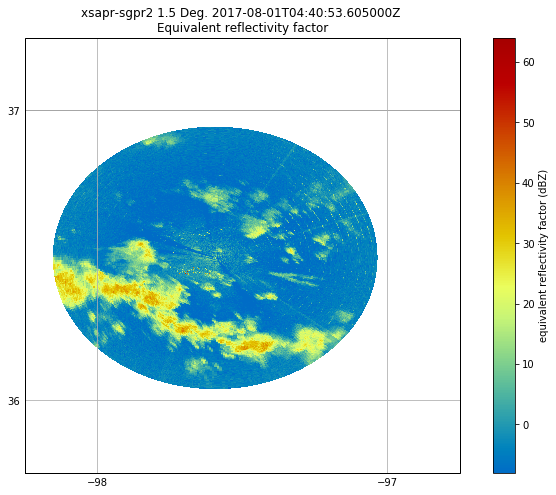

In [5]:
fig = plt.figure(figsize=[12, 8])
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('reflectivity', sweep=2, resolution='50m',
                     vmin=-8, vmax=64, min_lon=-98.25, max_lon=-96.75,
                     min_lat=35.75, max_lat=37.25,
                     projection=ccrs.PlateCarree())
plt.show()

You can change many parameters in the graph by changing the arguments to plot_ppi_map. As you can recall from earlier. simply view these arguments in a Jupyter notebook by typing:

In [ ]:
display.plot_ppi_map?

For example, let's change the colormap to something different

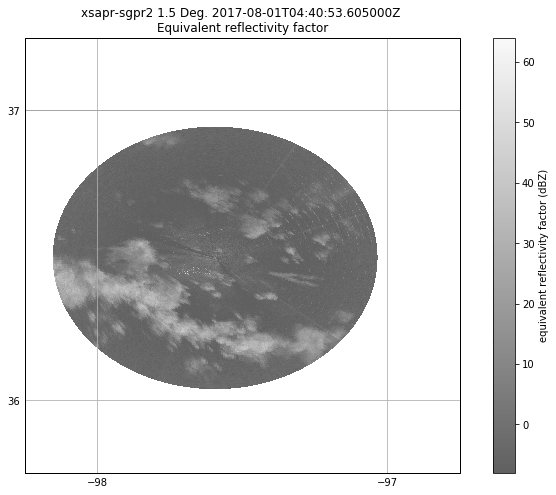

In [6]:
fig = plt.figure(figsize=[12, 8])
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('reflectivity', sweep=2, resolution='50m',
                     vmin=-8, vmax=64, min_lon=-98.25, max_lon=-96.75,
                     min_lat=35.75, max_lat=37.25,
                     projection=ccrs.PlateCarree(), cmap='pyart_Gray9')
plt.show()

Or, let's view a different elevation scan! To do this, change the sweep parameter in the plot_ppi_map function.

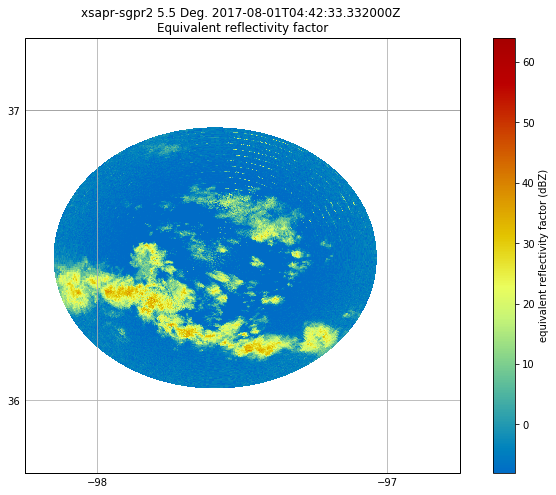

In [7]:
fig = plt.figure(figsize=[12, 8])
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('reflectivity', sweep=6, resolution='50m',
                     vmin=-8, vmax=64, min_lon=-98.25, max_lon=-96.75,
                     min_lat=35.75, max_lat=37.25,
                     projection=ccrs.PlateCarree())
plt.show()

Or, display radial velocity instead of reflectivity.

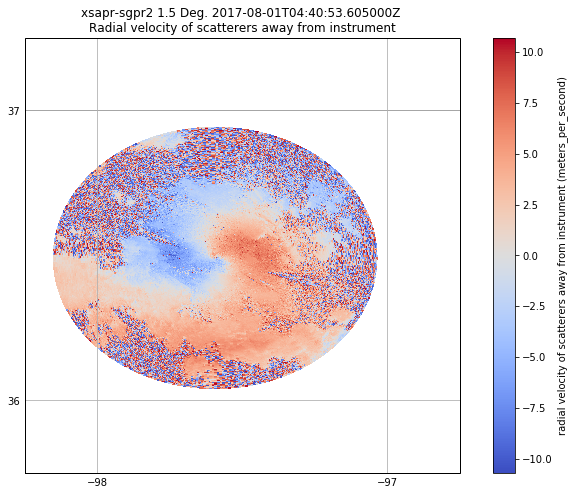

In [8]:
nyq = radar.instrument_parameters['nyquist_velocity']['data'][0]

fig = plt.figure(figsize=[12, 8])
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('velocity', sweep=2, resolution='50m',
                     vmin=-nyq, vmax=nyq, min_lon=-98.25, max_lon=-96.75,
                     min_lat=35.75, max_lat=37.25,
                     projection=ccrs.PlateCarree(), cmap='coolwarm')
plt.show()

## Exercise

Now that the basics of loading and processing Cf/Radial files has been introduced, let's go ahead use what we have learned to load and plot the file nsaxsaprppiC1.a1.20140201.184802.nc located in the data directory. Recommend using radar.fields.keys() to check the name of the fields for plotting. Play around with changing factors such as the field plotted, color scale, color maps, axes limits to get a feel for how to visualize radar data with Py-ART.

Press shift-Enter in the below cell for a possible answer. There are many ways to visualize data using Py-ART, so the answer here is not necessarily the only one!

In [ ]:
%load section_1_answer.py
